# Statistics of $t$ with many samples

Let's generate many pairs of samples, calculate $t$ for each pair and study the resulting distribution

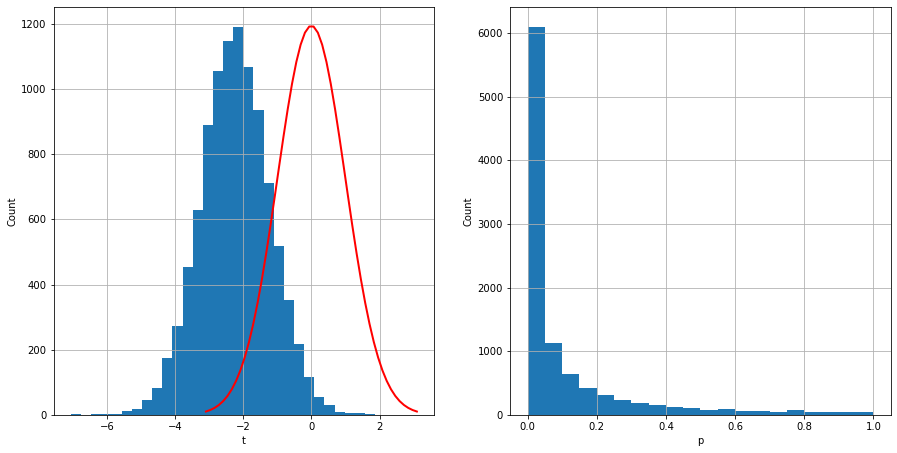

In [12]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pylab as plt
import numpy as np

# Parameters of the normal distributions to use
# and number of points per sample
mu1=0
mu2=0.1
sig=1

N= 1000
M= 1000
Ntests= 10000

# Generate pairs of normal samples and collect t
t_list=[]
p_list=[]

for i in range(Ntests):
    x = scp.norm.rvs(mu1, sig, N)
    y = scp.norm.rvs(mu2, sig, M)
    t_stat, p_val = scp.ttest_ind(x, y, equal_var=False)
    t_list.append(t_stat)
    p_list.append(p_val)
    
    
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)

# Plot histogram of t values 
p1= plt.subplot(1,2,1)
h= plt.hist(t_list,30)
plt.grid(True)
plt.xlabel('t')
plt.ylabel('Count')

# Add t distribution
dist = scp.t(N+M-2)
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999)) 
y= dist.pdf(x)
plt.plot(x, max(h[0])*y/max(y),'r-', lw=2)

# Plot histogram of p values 
p1= plt.subplot(1,2,2)
h= plt.hist(p_list,20)
plt.grid(True)
plt.xlabel('p')
plt.ylabel('Count')

p= plt.show

## The $t$ distribution and the significance

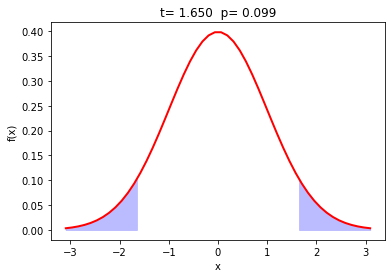

In [11]:
%matplotlib inline
import scipy.stats as scp
import matplotlib.pyplot as plt
import numpy as np

# Parameters of the T distribution
df = 1998
dist = scp.t(df)

# ----------------------------------------
# Plot the T distribution
# ----------------------------------------
x = np.linspace(dist.ppf(0.001), dist.ppf(0.999)) 

plt.plot(x, dist.pdf(x),'r-', lw=2)
plt.ylabel('f(x)')
plt.xlabel('x')


#---------------------------------------------------------
# Shadow the wings for a given value of t and calculate P
#---------------------------------------------------------
t= 1.65
p_val= dist.cdf(-abs(t))
plt.title("t= {:.3f}  p= {:.3f}".format(t, 2.*p_val))
x = np.linspace(dist.ppf(0.001), -t) 
plt.fill_between(x,dist.pdf(x), color="#BBBBFF")
x = np.linspace(t, dist.ppf(0.999)) 
plt.fill_between(x,dist.pdf(x), color="#BBBBFF")

plt.show()